编写一个高效的算法来搜索 m x n 矩阵 matrix 中的一个目标值 target 。该矩阵具有以下特性：

每行的元素从左到右升序排列。
每列的元素从上到下升序排列。
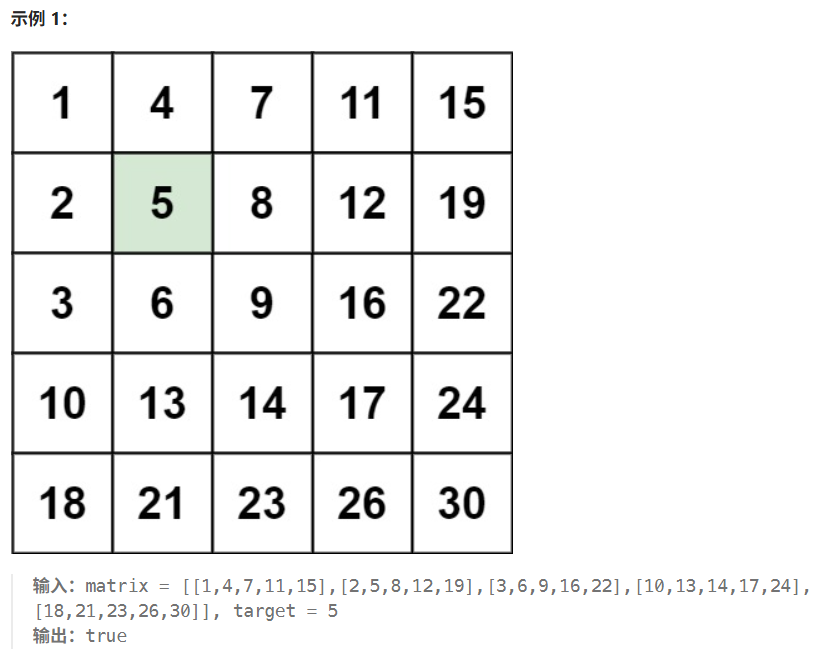

思路分析
==
为啥这是中等难度 要是不在乎时间复杂度的话，我感觉还是很简单的。  
先找右下角的元素，判断有没有在这个矩阵里，然后查看最后一列元素缩小范围  
（这个矩阵的行和列其实是等价的，转置之后不会影响矩阵的结构）  
应该是用两个指针放在对角线上，然后缩进到只剩2*2的矩阵  
不对 不能对角线往前走，还是得按照行和列分别递进  

写是写完了，这未免也太丑陋了点就是，这么多判断 看看真正的代码是什么样的吧

In [3]:
from typing import List
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        m=len(matrix)
        n=len(matrix[0])
        top_row=0
        top_col=0
        bottom_row=m-1
        bottom_col=n-1
        if target<matrix[top_row][top_col] or target>matrix[bottom_row][bottom_col]:
            return False
        while top_row!=bottom_row or top_col!=bottom_col:
            if target==matrix[top_row][top_col] or target==matrix[bottom_row][bottom_col] or target==matrix[bottom_row][top_col] or target==matrix[top_row][bottom_col] :
                return True
            if  top_row!=bottom_row and target<matrix[bottom_row][top_col]:
                bottom_row-=1
                continue
            if top_col!=bottom_col and target<matrix[top_row][bottom_col]:
                bottom_col-=1
                continue
            if top_row!=bottom_row and target>matrix[top_row][bottom_col]:
                top_row+=1
                continue
            if top_col!=bottom_col and target>matrix[bottom_row][top_col]:
                top_col+=1
                continue
        if target==matrix[top_row][top_col] or target==matrix[bottom_row][bottom_col]:
                return True
        else:
            return False
            

In [4]:
a=Solution()
a.searchMatrix([[1,3,5]],4)

False

标答给了个方法，但其实我看的不是很明白，至少不明他的精妙之处为什么会在那，为啥右上角的元素信息量会这么大  
还真是，反对角线的元素信息量其实是最大的，一开始是有点先入为主了

In [ ]:
from typing import List
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        m=len(matrix)
        n-len(matrix[0])
        row=0
        col=n-1
        # 这个地方的边界条件还挺巧妙的，这个col>=0一定不会越界，真是神奇
        while row<m-1 and col>=0:
            if target==matrix[row][col]:
                return True
            if target>matrix[row][col]:
                row+=1
            else:
                col-=1
        